In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the file data.csv
# Show the first few records
data = pd.read_csv("../Herhalingsoefening/data.csv")
data.head()

Position                  Track Name         Artist  Streams  \
0         1  Reggaetón Lento (Bailemos)           CNCO    19272   
1         2                    Chantaje        Shakira    19270   
2         3   Otra Vez (feat. J Balvin)  Zion & Lennox    15761   
3         4                Vente Pa' Ca   Ricky Martin    14954   
4         5                      Safari       J Balvin    14269   

                                                 URL        Date Region  
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01     ec  
1  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  2017-01-01     ec  
2  https://open.spotify.com/track/3QwBODjSEzelZyV...  2017-01-01     ec  
3  https://open.spotify.com/track/7DM4BPaS7uofFul...  2017-01-01     ec  
4  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  2017-01-01     ec

In [3]:
# Show the general information about the data
data.describe()

Position       Streams
count  3.441197e+06  3.441197e+06
mean   9.464399e+01  5.189176e+04
std    5.739567e+01  2.018035e+05
min    1.000000e+00  1.001000e+03
25%    4.500000e+01  3.322000e+03
50%    9.200000e+01  9.227000e+03
75%    1.430000e+02  2.965800e+04
max    2.000000e+02  1.138152e+07

In [4]:
# Drop the column URL because it is of no need
# Show the first few records
data = data.drop('URL', axis = 1)
data.head()

Position                  Track Name         Artist  Streams        Date  \
0         1  Reggaetón Lento (Bailemos)           CNCO    19272  2017-01-01   
1         2                    Chantaje        Shakira    19270  2017-01-01   
2         3   Otra Vez (feat. J Balvin)  Zion & Lennox    15761  2017-01-01   
3         4                Vente Pa' Ca   Ricky Martin    14954  2017-01-01   
4         5                      Safari       J Balvin    14269  2017-01-01   

  Region  
0     ec  
1     ec  
2     ec  
3     ec  
4     ec

In [5]:
# Give the dimensions of the data
data.shape

(3441197, 6)

In [6]:
# Give for each column the number of values available
data.count()

Position      3441197
Track Name    3440540
Artist        3440540
Streams       3441197
Date          3441197
Region        3441197
dtype: int64

In [7]:
# You can see that there are some columns with no data available for the Track Name and Artist
# Drop the records which empty values for some columns
data = data.dropna()

In [8]:
# Give for each column the number of values available
data.count()

Position      3440540
Track Name    3440540
Artist        3440540
Streams       3440540
Date          3440540
Region        3440540
dtype: int64

In [9]:
# Give the datatype of each column
data.dtypes

Position       int64
Track Name    object
Artist        object
Streams        int64
Date          object
Region        object
dtype: object

In [10]:
# Which different regions are available. Is Belgium (be) one of these regions?
data['Region'].unique()

array(['ec', 'fr', 'ar', 'fi', 'no', 'it', 'lt', 'ph', 'tw', 'nz', 'ee',
       'tr', 'us', 'sv', 'cr', 'de', 'cl', 'jp', 'br', 'hn', 'gt', 'ch',
       'hu', 'ca', 'pe', 'be', 'my', 'dk', 'bo', 'pl', 'at', 'pt', 'se',
       'mx', 'pa', 'uy', 'is', 'es', 'cz', 'ie', 'nl', 'sk', 'co', 'sg',
       'id', 'do', 'lu', 'gb', 'global', 'py', 'au', 'lv', 'gr', 'hk'],
      dtype=object)

In [11]:
# What is the minimum date?
data['Date'].min()

'2017-01-01'

In [12]:
# What is the maximum date?
data['Date'].max()

'2018-01-09'

In [13]:
# Transform the Track Name's into lower case
data['Track Name'] = data['Track Name'].str.lower()
data.head()

Position                  Track Name         Artist  Streams        Date  \
0         1  reggaetón lento (bailemos)           CNCO    19272  2017-01-01   
1         2                    chantaje        Shakira    19270  2017-01-01   
2         3   otra vez (feat. j balvin)  Zion & Lennox    15761  2017-01-01   
3         4                vente pa' ca   Ricky Martin    14954  2017-01-01   
4         5                      safari       J Balvin    14269  2017-01-01   

  Region  
0     ec  
1     ec  
2     ec  
3     ec  
4     ec

In [14]:
# Transform the Artist into lower case
data['Artist'] = data['Artist'].str.lower()
data.head()

Position                  Track Name         Artist  Streams        Date  \
0         1  reggaetón lento (bailemos)           cnco    19272  2017-01-01   
1         2                    chantaje        shakira    19270  2017-01-01   
2         3   otra vez (feat. j balvin)  zion & lennox    15761  2017-01-01   
3         4                vente pa' ca   ricky martin    14954  2017-01-01   
4         5                      safari       j balvin    14269  2017-01-01   

  Region  
0     ec  
1     ec  
2     ec  
3     ec  
4     ec

In [15]:
# How many unique artists are there in the dataset?
len(data['Artist'].unique())

6619

In [16]:
# Are there any songs with the same name but with a different artist?
result = data.groupby('Track Name')['Artist'].unique().reset_index()
result['Artist'] = result['Artist'].map(len)
result = result[result['Artist'] > 1]
result.head()

Track Name  Artist
52      1 op 1       2
65    10 jahre       2
96          15       2
106         18       2
117       1994       2

In [17]:
# What was the most often streamed song in the entire world?
data.groupby(['Track Name', 'Artist'])['Streams'].sum().reset_index().sort_values(by='Streams',ascending=False).head()

Track Name            Artist     Streams
13900                        shape of you        ed sheeran  2993988783
3581                    despacito - remix        luis fonsi  1829621841
3580   despacito (featuring daddy yankee)        luis fonsi  1460802540
14480            something just like this  the chainsmokers  1386258295
6706                              humble.    kendrick lamar  1311243745

In [18]:
# Now it looks like Despacito of Luis Fonsi was less popular than Shape of You of Ed Sheeran
# Give all the different versions in the dataset of the song Despacito
data[(data['Track Name'].str.startswith('despacito'))]

Position                          Track Name      Artist  Streams  \
2425           26  despacito (featuring daddy yankee)  luis fonsi     6197   
2603            4  despacito (featuring daddy yankee)  luis fonsi    16088   
2800            1  despacito (featuring daddy yankee)  luis fonsi    21318   
3000            1  despacito (featuring daddy yankee)  luis fonsi    29118   
3200            1  despacito (featuring daddy yankee)  luis fonsi    33448   
...           ...                                 ...         ...      ...   
3440591       195  despacito (featuring daddy yankee)  luis fonsi     2092   
3440642        46                   despacito - remix  luis fonsi     4914   
3440795       199  despacito (featuring daddy yankee)  luis fonsi     1963   
3440851        55                   despacito - remix  luis fonsi     5016   
3441052        56                   despacito - remix  luis fonsi     4906   

               Date Region  
2425     2017-01-13     ec  
2603     2017-01-14     ec  
2800     2017-01-15     ec  
3000     2017-01-16     ec  
3200     2017-01-17     ec  
...             ...    ...  
3440591  2018-01-06     hk  
3440642  2018-01-07     hk  
3440795  2018-01-07     hk  
3440851  2018-01-08     hk  
3441052  2018-01-09     hk  

[28500 rows x 6 columns]

In [19]:
# How many times was Despacito streamed over the entire world if you make no difference between the different versions?
data[(data['Track Name'].str.startswith('despacito'))]['Streams'].sum()

3290523447

In [20]:
# What was the most popular of the 4 different versions of despacito?
result = data[(data['Track Name'].str.startswith('despacito'))]
result = result.groupby('Track Name')['Streams'].sum().reset_index().sort_values(by='Streams',ascending=False)
result.head()

Track Name     Streams
2                   despacito - remix  1829621841
1  despacito (featuring daddy yankee)  1460802540
3           despacito - versión salsa       88559
0                           despacito       10507

In [21]:
# Is the version of despacito with Justin Bieber also available in the dataset?
data[(data['Track Name'].str.startswith('despacito')) & (data['Artist'] == 'justin bieber')]

Empty DataFrame
Columns: [Position, Track Name, Artist, Streams, Date, Region]
Index: []

In [22]:
# Give a list of songs that were only streamed in Belgium
result = data.groupby('Track Name')['Region'].unique().reset_index()
result['Region'] = result['Region'].map(', '.join)
result[result['Region'] == 'be'].head()

Track Name Region
293                        a dream that never stops     be
465                                          afraid     be
489                                           agora     be
705                                     alles is op     be
710  alles voor mij (uit liefde voor muziek) - live     be

In [23]:
# Show the christmas songs that are in the dataset (i.e. the Track Name contains the word christmas)
data[(data['Track Name'].str.contains('christmas'))].groupby(['Track Name', 'Artist']).count()

Position  \
Track Name                                         Artist                             
8 days of christmas - live                         destiny's child              140   
a christmas carol main title                       alan silvestri                 1   
a christmas kiss ft. mia stegmar                   the snowy hill singers         9   
a christmas song for you                           jose mari chan                 1   
a holly jolly christmas                            lady antebellum               32   
...                                                                             ...   
wonderful christmastime - recorded at spotify s... xavier omär                    1   
wonderful christmastime - remastered 2011 / edi... paul mccartney               459   
you make it feel like christmas (feat. blake sh... gwen stefani                 162   
you're a mean one, mr. grinch - from dr. seuss'... thurl ravenscroft             75   
クリスマス -white falcon & blue christmas- remixed b... sunny day service              3   

                                                                           Streams  \
Track Name                                         Artist                            
8 days of christmas - live                         destiny's child             140   
a christmas carol main title                       alan silvestri                1   
a christmas kiss ft. mia stegmar                   the snowy hill singers        9   
a christmas song for you                           jose mari chan                1   
a holly jolly christmas                            lady antebellum              32   
...                                                                            ...   
wonderful christmastime - recorded at spotify s... xavier omär                   1   
wonderful christmastime - remastered 2011 / edi... paul mccartney              459   
you make it feel like christmas (feat. blake sh... gwen stefani                162   
you're a mean one, mr. grinch - from dr. seuss'... thurl ravenscroft            75   
クリスマス -white falcon & blue christmas- remixed b... sunny day service             3   

                                                                           Date  \
Track Name                                         Artist                         
8 days of christmas - live                         destiny's child          140   
a christmas carol main title                       alan silvestri             1   
a christmas kiss ft. mia stegmar                   the snowy hill singers     9   
a christmas song for you                           jose mari chan             1   
a holly jolly christmas                            lady antebellum           32   
...                                                                         ...   
wonderful christmastime - recorded at spotify s... xavier omär                1   
wonderful christmastime - remastered 2011 / edi... paul mccartney           459   
you make it feel like christmas (feat. blake sh... gwen stefani             162   
you're a mean one, mr. grinch - from dr. seuss'... thurl ravenscroft         75   
クリスマス -white falcon & blue christmas- remixed b... sunny day service          3   

                                                                           Region  
Track Name                                         Artist                          
8 days of christmas - live                         destiny's child            140  
a christmas carol main title                       alan silvestri               1  
a christmas kiss ft. mia stegmar                   the snowy hill singers       9  
a christmas song for you                           jose mari chan               1  
a holly jolly christmas                            lady antebellum             32  
...                                                                           ...  
wonderful christmastime - recorded at spotify s... xavier omär          

In [24]:
# Was 'all i want for christmas is you' streamed at all during july and august?
data[((data['Date'].str[5:7] == '07') | (data['Date'].str[5:7] == '08')) & (data['Track Name'] == 'all i want for christmas is you')]

Empty DataFrame
Columns: [Position, Track Name, Artist, Streams, Date, Region]
Index: []

In [25]:
# On which day was 'all i want for christmas is you' streamed for the first time after the summer?
data[(data['Date'].str[5:7] > '08') & (data['Track Name'] == 'all i want for christmas is you')]['Date'].min()

'2017-11-01'

In [26]:
# How did the songs of Ed Sheeran perform in 2017 in Belgium on each day: give for each track the number of days it was streamed in belgium.
data[(data['Region'] == 'be') & (data['Artist'] == 'ed sheeran')].groupby('Track Name')['Date'].count().reset_index().sort_values(by = 'Date', ascending=False)

Track Name  Date
33                                  thinking out loud   367
25                                       shape of you   366
3                                  castle on the hill   364
23                                         photograph   356
7                                         galway girl   310
20                                            perfect   308
10                                            happier   187
4                                                dive    82
34                                    what do i know?    79
13                                         i see fire    75
12                         how would you feel (paean)    66
31                                       tenerife sea    64
1                                           barcelona    62
32                                         the a team    59
18                                            new man    54
30                                supermarket flowers    53
17                                     nancy mulligan    47
11                     hearts don't break around here    44
6                                              eraser    42
21                perfect duet (ed sheeran & beyoncé)    40
2                                      bibia be ye ye    36
24                                        save myself    32
5                                               don't    25
8                   galway girl - martin jensen remix    24
26  shape of you (major lazer remix) [feat. nyla &...     9
9                                        give me love     8
27                            shape of you - acoustic     8
14                                         i'm a mess     4
22     perfect symphony (ed sheeran & andrea bocelli)     4
16                                         lego house     3
15                                            kiss me     3
29                                               sing     2
19                                                one     2
28                      shape of you - galantis remix     1
0   ...baby one more time - recorded at spotify st...     1

In [27]:
# Give the artists that have more than one song on the Top 100 Songs List in Belgium
result = data[(data['Region'] == 'be') & (data['Position'] <= 100)].groupby('Artist')['Track Name'].describe()
result[result['unique'] >= 2]['unique'].head()

Artist
21 savage        2
adele            4
alan walker      4
alessia cara     2
andy williams    2
Name: unique, dtype: object

In [28]:
# Create a new dataframe plotData that contains the Date and Streams of despacito in belgium
# Transform the column Date to_datetime
# Add a new column Week to plotData that contains the week (use .dt.week)
# Drop the column Date because it's of no use anymore
# Calculate the average number of Streams per week. Divide the result by 1000 (to get smaller numbers) 
# and transform the result to an integer
# Plot the resulting data

plotData = data[(data['Track Name'].str.startswith('despacito')) & (data['Region'] == 'be')][['Date', 'Streams']]
plotData['Date'] = pd.to_datetime(plotData['Date'])
plotData['Week'] = plotData['Date'].dt.week
plotData = plotData.drop('Date', axis = 1)
plotData = plotData.groupby('Week')['Streams'].mean().reset_index()
plotData['Streams'] /= 1000
plotData['Streams'] = plotData['Streams'].astype(int)
plotData.head(20)

Week  Streams
0      1        6
1      2        3
2      3        2
3      4        4
4      5        6
5      6       10
6      7       13
7      8       13
8      9       15
9     10       14
10    11       16
11    12       16
12    13       16
13    14       15
14    15       16
15    16       15
16    17       22
17    18       24
18    19       26
19    20       29

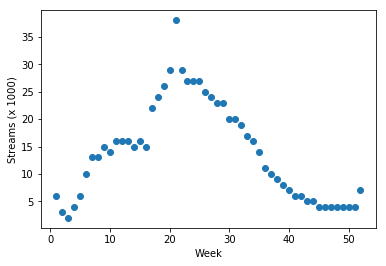

In [29]:
# imports for plotting
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(plotData['Week'], plotData['Streams'])
plt.xlabel('Week')
plt.ylabel('Streams (x 1000)')
plt.show()

In [30]:
# Create a new dataframe extra that contains the most often streamed Track Name's for each month 
# for each of the following regions: au, be, de, fr, gb, it, nl
# Transform the column Date to_datetime
# Add a new column Week to plotData that contains the week (use .dt.week)
# Drop the column Date because it's of no use anymore

extra = data[data['Region'].isin(['au', 'be', 'de', 'fr', 'gb', 'it', 'nl'])][['Region','Date', 'Streams','Track Name']]
extra['Date'] = pd.to_datetime(extra['Date'])
extra['Month'] = extra['Date'].dt.month 
extra.drop('Date', axis = 1)
extra = extra.groupby(['Region','Month','Track Name'])['Streams'].sum().reset_index().sort_values(by='Streams',ascending=False)
extra.head()

Region  Month          Track Name   Streams
18342     gb      1        shape of you  28560163
19193     gb      3         galway girl  24033076
19418     gb      3        shape of you  23138207
17956     gb      1  castle on the hill  21308965
18908     gb      2        shape of you  20378105

In [31]:
# Create a new dataframe extra2 based on the dataframe extra that contains all information about the 4 versions of despacito
# Create a pivot_table that shows the total number of streams of the 4 versions of despacito 
# for each region (au, be, de, fr, gb, it, nl) for each month

extra2 = extra[extra['Track Name'].str.startswith('despacito')]
pd.pivot_table(extra2, values='Streams', index=['Month'],columns=['Region'], aggfunc='sum').fillna(0)

Region       au       be        de       fr        gb       it        nl
Month                                                                   
1        402061   151421   1439340   481107   1044992   732903    581959
2        608256   333684   3508335   830513   1285494  3150414   1664582
3        688520   499678   3927367  1762023   1559514  5837870   2582056
4       1072151   792454  10103525  3468600   3915577  6399796   5083528
5       6521803  1631778  20385311  6255027  21158060  6128627  10551510
6       7800207  1599733  17779253  6623713  22629372  5336027   9334846
7       6808420  1434239  14141890  6490173  18751502  4651101   7219044
8       5425760  1100817   8968624  4324038  12689654  3488342   4885940
9       3642005   631181   4989549  2315402   6933812  1871671   2607975
10      2175550   399317   3581255  1441067   4486165  1094020   1701625
11      1240712   276807   2660867   729487   3334032   633636    837296
12      1361912   325101   2105271   900017   3128093   870638   1004647

In [32]:
# Create a new dataframe extra3 based on the dataframe extra that contains the most popular Track Name
# for each region (au, be, de, fr, gb, it, nl) for each month

extra3 = extra.drop('Streams', axis = 1)
extra3 = extra3.drop_duplicates(['Region','Month'], keep='first')
extra3 = extra.sort_values(by=['Region','Month'], ascending=True)
extra3.head()

Region  Month                                         Track Name  Streams
389     au      1                                       shape of you  7011621
73      au      1                                 castle on the hill  4931822
188     au      1  i don’t wanna live forever (fifty shades darke...  4362247
417     au      1                                            starboy  4197082
359     au      1            rockabye (feat. sean paul & anne-marie)  4085628

In [33]:
# Create a new dataframe extra4 based on the dataframe data that only contains the Track Name's
# Make sure there are no duplicates for the Track Name's
extra4 = data[['Track Name']]
extra4 = extra4.drop_duplicates(keep='first')
extra4.head()

Track Name
0  reggaetón lento (bailemos)
1                    chantaje
2   otra vez (feat. j balvin)
3                vente pa' ca
4                      safari

In [34]:
# Detect the language for each Track Name in the dataframe extra4
# You have to use try - except otherwise you can get the LangDetectException: No features in text.
# for weird titles like #1111, because he can't decide on the language

import nltk
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'NoLang'

extra4['lang'] = extra4['Track Name'].map(detect_language)

In [35]:
# We will use only the english Track Name's
extra4 = extra4[extra4['lang'] == 'en']
extra4.head()

Track Name lang
20                                   don't wanna know   en
29         we don't talk anymore (feat. selena gomez)   en
31  can't stop the feeling! (original song from dr...   en
35              cold water (feat. justin bieber & mø)   en
38                                in the name of love   en

In [36]:
# How many different words are used in the Track Name's?
# Apply TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(extra['Track Name'])
print(len(vec.get_feature_names()))

6565


C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [37]:
# What are the most frequently used words in the Track Name's?
allTrackNames = extra['Track Name'].to_numpy()
result = ''
for track in allTrackNames:
    result += track

# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
# download punkt otherwise you get an error: Resource 'tokenizers/punkt/english.pickle' not found.
nltk.download('punkt')
token = word_tokenize(result)

from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\svre257\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(')', 4468),
 ('(', 4467),
 ('.', 3437),
 ('feat', 3065),
 ('-', 2610),
 ('the', 1432),
 ('&', 1194),
 ('me', 1106),
 ('you', 1016),
 ("n't", 959)]

In [38]:
# Create a new dataframe extra5 based on the dataframe data that contains the total number of streams per Track Name
# and per artist
extra5 = data.groupby(['Track Name', 'Artist'])['Streams'].sum().reset_index()
extra5.head()

Track Name          Artist  Streams
0  "all that is or ever was or ever will be"  alan silvestri     7311
1               "read all about it, pt. iii"     emeli sandé    57025
2                                        #99             jvg    31826
3                                     #askip         black m   296862
4                    #biziz - feat. lil bege         reynmen   403591

In [39]:
# Read the file featuresdf.csv into the dataframe features
# Show the few first records
features = pd.read_csv('./featuresdf.csv')
features.head()

id                                name  \
0  7qiZfU4dY1lWllzX7mPBI                        Shape of You   
1  5CtI0qwDJkDQGwXD1H1cL                   Despacito - Remix   
2  4aWmUDTfIPGksMNLV2rQP  Despacito (Featuring Daddy Yankee)   
3  6RUKPb4LETWmmr3iAEQkt            Something Just Like This   
4  3DXncPQOG4VBw3QHh3S81                         I'm the One   

            artists  danceability  energy   key  loudness  mode  speechiness  \
0        Ed Sheeran         0.825   0.652   1.0    -3.183   0.0       0.0802   
1        Luis Fonsi         0.694   0.815   2.0    -4.328   1.0       0.1200   
2        Luis Fonsi         0.660   0.786   2.0    -4.757   1.0       0.1700   
3  The Chainsmokers         0.617   0.635  11.0    -6.769   0.0       0.0317   
4         DJ Khaled         0.609   0.668   7.0    -4.284   1.0       0.0367   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.5810          0.000000    0.0931    0.931   95.977     233713.0   
1        0.2290          0.000000    0.0924    0.813   88.931     228827.0   
2        0.2090          0.000000    0.1120    0.846  177.833     228200.0   
3        0.0498          0.000014    0.1640    0.446  103.019     247160.0   
4        0.0552          0.000000    0.1670    0.811   80.924     288600.0   

   time_signature  
0             4.0  
1             4.0  
2             4.0  
3             4.0  
4             4.0

In [40]:
# Drop the column id
features = features.drop('id', axis = 1)
features.head()

name           artists  danceability  energy  \
0                        Shape of You        Ed Sheeran         0.825   0.652   
1                   Despacito - Remix        Luis Fonsi         0.694   0.815   
2  Despacito (Featuring Daddy Yankee)        Luis Fonsi         0.660   0.786   
3            Something Just Like This  The Chainsmokers         0.617   0.635   
4                         I'm the One         DJ Khaled         0.609   0.668   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   1.0    -3.183   0.0       0.0802        0.5810          0.000000   
1   2.0    -4.328   1.0       0.1200        0.2290          0.000000   
2   2.0    -4.757   1.0       0.1700        0.2090          0.000000   
3  11.0    -6.769   0.0       0.0317        0.0498          0.000014   
4   7.0    -4.284   1.0       0.0367        0.0552          0.000000   

   liveness  valence    tempo  duration_ms  time_signature  
0    0.0931    0.931   95.977     233713.0             4.0  
1    0.0924    0.813   88.931     228827.0             4.0  
2    0.1120    0.846  177.833     228200.0             4.0  
3    0.1640    0.446  103.019     247160.0             4.0  
4    0.1670    0.811   80.924     288600.0             4.0

In [41]:
# Transform the columns name and artists to lower case
features['name'] = features['name'].str.lower()
features['artists'] = features['artists'].str.lower()
features.head()

name           artists  danceability  energy  \
0                        shape of you        ed sheeran         0.825   0.652   
1                   despacito - remix        luis fonsi         0.694   0.815   
2  despacito (featuring daddy yankee)        luis fonsi         0.660   0.786   
3            something just like this  the chainsmokers         0.617   0.635   
4                         i'm the one         dj khaled         0.609   0.668   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   1.0    -3.183   0.0       0.0802        0.5810          0.000000   
1   2.0    -4.328   1.0       0.1200        0.2290          0.000000   
2   2.0    -4.757   1.0       0.1700        0.2090          0.000000   
3  11.0    -6.769   0.0       0.0317        0.0498          0.000014   
4   7.0    -4.284   1.0       0.0367        0.0552          0.000000   

   liveness  valence    tempo  duration_ms  time_signature  
0    0.0931    0.931   95.977     233713.0             4.0  
1    0.0924    0.813   88.931     228827.0             4.0  
2    0.1120    0.846  177.833     228200.0             4.0  
3    0.1640    0.446  103.019     247160.0             4.0  
4    0.1670    0.811   80.924     288600.0             4.0

In [42]:
# Merge the dataframe features and extra5 into the dataframe new_df
# Show the few first records
new_df = pd.merge(features, extra5,  how='left', left_on=['name','artists'], right_on = ['Track Name','Artist'])
new_df.head()

name           artists  danceability  energy  \
0                        shape of you        ed sheeran         0.825   0.652   
1                   despacito - remix        luis fonsi         0.694   0.815   
2  despacito (featuring daddy yankee)        luis fonsi         0.660   0.786   
3            something just like this  the chainsmokers         0.617   0.635   
4                         i'm the one         dj khaled         0.609   0.668   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   1.0    -3.183   0.0       0.0802        0.5810          0.000000   
1   2.0    -4.328   1.0       0.1200        0.2290          0.000000   
2   2.0    -4.757   1.0       0.1700        0.2090          0.000000   
3  11.0    -6.769   0.0       0.0317        0.0498          0.000014   
4   7.0    -4.284   1.0       0.0367        0.0552          0.000000   

   liveness  valence    tempo  duration_ms  time_signature  \
0    0.0931    0.931   95.977     233713.0             4.0   
1    0.0924    0.813   88.931     228827.0             4.0   
2    0.1120    0.846  177.833     228200.0             4.0   
3    0.1640    0.446  103.019     247160.0             4.0   
4    0.1670    0.811   80.924     288600.0             4.0   

                           Track Name            Artist     Streams  
0                        shape of you        ed sheeran  2993988783  
1                   despacito - remix        luis fonsi  1829621841  
2  despacito (featuring daddy yankee)        luis fonsi  1460802540  
3            something just like this  the chainsmokers  1386258295  
4                         i'm the one         dj khaled  1254196301

In [43]:
# Divide the number of streams by 1000000 to get smaller numbers
new_df['Streams'] /= 1000000

In [44]:
# We want to create a linear regression model to try to predict the streams 
# Drop the columns that aren't necessary any more
new_df = new_df.drop(['Track Name', 'Artist', 'name', 'artists'], axis = 1)

In [45]:
# Create the training and test data
from sklearn.model_selection import train_test_split
X = new_df.drop('Streams',axis=1)
y = new_df['Streams']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [46]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [47]:
poly = PolynomialFeatures(degree=3)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 1575.811359215779

Mean Squared Error: 4840361.86296829

Root Mean Squared Error: 2200.0822400465604

R square: -65.66425099845773



In [49]:
# Create a RandomForestRegressor to predict the number of Streams
# What are the most important features to predict if a song will become a hit?

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [50]:
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

mae = mean_absolute_error(y_test,y_predict)

print('Mean Absolute Error: '+ str(MAE))
r2 = r2_score(y_test,y_predict)
print('R square: ' + str(r2))  

Mean Absolute Error: 1575.811359215779
R square: -0.6031088044799515


In [51]:
print(X_train.columns)
print(model.feature_importances_)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')
[5.68369346e-02 5.20754470e-02 3.34938566e-02 6.72500817e-02
 1.02384863e-02 7.39558082e-02 1.35089400e-01 1.94192476e-02
 7.37238400e-02 3.62494847e-01 5.30516311e-02 6.21224164e-02
 2.48003547e-04]
